<a href="https://colab.research.google.com/github/galitneu/auto-eda-tool/blob/main/eda_tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving pain_survey_1500.csv to pain_survey_1500 (8).csv


RadioButtons(layout=Layout(width='auto'), options=('תיאור כללי (מספר שורות ועמודת, רמשימת העמודות וסוגי נתונים…

Output()

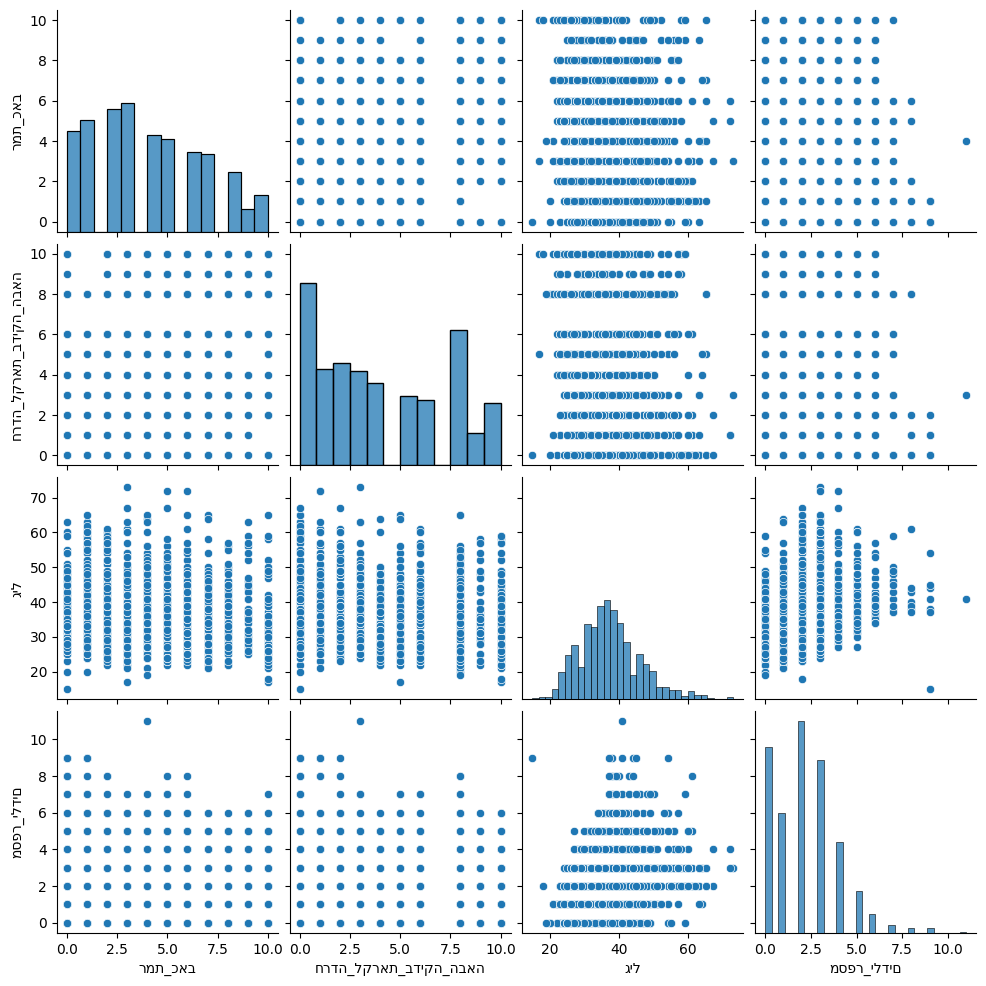

In [11]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive
#import plotly.express as px




def show_file_description(df_desc):
    #כמה עמודות וכמה שורות
    row=df_desc.shape[0]
    col=df_desc.shape[1]
    print(row,col)
    #מאיזה סוג של עמודה
    for cname,ctype in df_desc.dtypes.items():
        print(cname,ctype)
    sns.pairplot(df_desc)

def show_bivariate(df, numeric_list, all_list):
    def plot_correlation(col1, col2):
        if col2 in numeric_list:
           sns.scatterplot(data=df, x=col1 ,y=col2)
        else:
            display(df.groupby(col2)[col1].describe())
            sns.boxplot(x=col2, y=col1, data=df)
            plt.show()


    drop1= widgets.Dropdown(options=numeric_list, description="please choose")
    drop2= widgets.Dropdown(options=all_list, description="please choose")

    interactive_plot = interactive(plot_correlation, col1=drop1, col2=drop2)

    # 5. הצגת הווידג'טים והפלט האינטראקטיבי
    display(drop1, drop2) # מציג את התפריטים
    display(interactive_plot.children[-1]) # מציג את הפלט של הגרף
       # pairplot -  שווה לנסות


def show_single_variable_analysis(df, all_list, numeric_list, numeric_df):

    def analyze_selected_column(col_selected):
        if col_selected in numeric_list:
            display(df[col_selected].describe())
            sns.displot(data=df, x=col_selected)
            plt.show()
            if numeric_df.shape[1]>1:
              corr_matrix=numeric_df.corr()
              sns.barplot(x=corr_matrix[col_selected].values, y=corr_matrix[col_selected].index)
              plt.show()
        else:
            display(df[col_selected].value_counts())
            sns.countplot(data=df, y=col_selected)
            plt.show()


    #הצגת עמודות ברשימה לבחירה
    column_selection= widgets.Dropdown(options=all_list, description="please choose")
    interactive_display = interactive(analyze_selected_column, col_selected=column_selection)
    display(column_selection)
    display(interactive_display.children[-1]) # מציג את הפלט של הגרף




uploaded=files.upload()
if uploaded:
    filename = list(uploaded.keys())[0]
    df= pd.read_csv(filename)

    numeric_df = df.select_dtypes(include=np.number)
    numeric_list=df.select_dtypes(include=np.number).columns.tolist()
    categorial_list=[]
    categorial_list=[c for c in df.select_dtypes(exclude=np.number).columns if (df[c].nunique() <= 8)]
    all_list=numeric_list+categorial_list


    menu=['תיאור כללי (מספר שורות ועמודת, רמשימת העמודות וסוגי נתונים, מידע על ערכים חסרים ועוד)', 'סטטיסטיקה וגרפים לעמודה (ניתוח חד משתני)','קשרים בין עמודות (ניתוח רב משתני)']
    rtl_alyout = widgets.Layout(width='auto')
    menu_widget = widgets.RadioButtons(options=menu, layout=rtl_alyout)
    display(menu_widget)
    output_area=widgets.Output()
    display(output_area)

    def on_menu_selection(selection):

      output_area.clear_output()
      option = selection['new']
      with output_area:
          if option == menu[0]:
            show_file_description(df)
          elif option == menu[1]:
            show_single_variable_analysis(df, all_list, numeric_list, numeric_df)
          else:
            show_bivariate(df, numeric_list, all_list)

    menu_widget.observe(on_menu_selection, names='value')
